# Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.metrics import silhouette_score

### Partie I : Observation du DataFrame ( Explore dataset )

In [ ]:
df_apr = pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-apr14.csv')
df_may = pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-may14.csv') 
df_jun= pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-jun14.csv')
df_jul = pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-jul14.csv')
df_aug = pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-aug14.csv')
df_sep = pd.read_csv('uber-trip-data/uber-trip-data/uber-raw-data-sep14.csv')
df_taxi = pd.read_csv('uber-trip-data/uber-trip-data/taxi-zone-lookup.csv')

In [ ]:
dataset= pd.concat([df_apr, df_may, df_jun, df_jul, df_aug, df_sep], ignore_index=True)

In [ ]:
#dataset=df_apr

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
print("Contenu du Dataset")
display(dataset.head(5))

print(f"Nombre de ligne et colonne du Dataset : {dataset.shape[0]} lignes et {dataset.shape[1]} colonnes")

print("\nPourcentage de valeures Null par colonnes")
#print(round((100*data.isnull().sum()/data.shape[0]),2))
display(dataset.isna().sum() * 100 / len(dataset))

print("\nComposition du Dataset")
display(dataset.describe(include='all'))

print("Type des features")
dataset.dtypes

In [ ]:
dataset['Base'].unique()

In [ ]:
dataset['Date/Time']=pd.to_datetime(dataset['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

In [ ]:
dataset.head()

In [ ]:
dataset.dtypes

In [ ]:
#dataset['Date']=pd.to_datetime(dataset['Date/Time'], format = '%m/%d/%Y %H:%M:%S').round('60min')

#data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
#data.dtypes



dataset['Date'] = pd.to_datetime(dataset['Date/Time'].dt.date)
dataset['month']= dataset['Date'].dt.month
dataset['day']= dataset['Date'].dt.day
dataset['day_of_week']= dataset['Date'].dt.weekday
dataset["dayofweek"] =  dataset["Date/Time"].dt.strftime("%A")
dataset['hour']= dataset['Date/Time'].dt.hour
dataset.columns

In [ ]:
dataset.tail(2)

In [ ]:
dataset.head(2)

In [ ]:
dataset.describe(include='all')

### Partie 2 : EDA et prétraitement des données pour le machine learning

In [ ]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Representation statistiques des demandes uber entre le mois d'avril et le mois de septembre 

In [ ]:
rep = pd.DataFrame(dataset['month'].value_counts())
rep



In [ ]:
rep.reset_index(inplace=True)

print(rep)

In [ ]:

plt.bar(rep['index'], rep['month'])
plt.show()

Representation statitistques des demandes uber en fontion des jours de la semaine

In [ ]:
rep2 = pd.DataFrame(dataset['dayofweek'].value_counts())
rep2

rep2.reset_index(inplace=True)

print(rep2)

In [ ]:
plt.bar(rep2['index'], rep2['dayofweek'])
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:


fig = make_subplots(rows=4, cols=2, subplot_titles=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


data_monday = dataset.loc[dataset['day_of_week'] == 0].hour
hist_data_monday = go.Histogram(x=data_monday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_monday, row=1, col=1)

data_tuesday = dataset.loc[dataset['day_of_week'] == 1].hour
hist_data_tuesday = go.Histogram(x=data_tuesday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_tuesday, row=1, col=2)

data_wednesday = dataset.loc[dataset['day_of_week'] == 2].hour
hist_data_wednesday = go.Histogram(x=data_wednesday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_wednesday, row=2, col=1)

data_thursday = dataset.loc[dataset['day_of_week'] == 3].hour
hist_data_thursday = go.Histogram(x=data_thursday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_thursday, row=2, col=2)

data_friday = dataset.loc[dataset['day_of_week'] == 4].hour
hist_data_friday = go.Histogram(x=data_friday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_friday, row=3, col=1)

data_saturday = dataset.loc[dataset['day_of_week'] == 5].hour
hist_data_saturday = go.Histogram(x=data_saturday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_saturday, row=3, col=2)

data_sunday = dataset.loc[dataset['day_of_week'] == 6].hour
hist_data_sunday = go.Histogram(x=data_sunday, xbins=dict(start=0, end=24, size=1), marker_color='#87CEFA')
fig.add_trace(hist_data_sunday, row=4, col=1)

# Update layout for better appearance
fig.update_layout(height=800, width=1000, showlegend=False)

# Show the plot
fig.show()

In [ ]:
import numpy as np

In [ ]:
dataset.head()

In [ ]:
jour = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
p = np.empty(shape=(24, 7), dtype=int)

for i in range(24):
  for j in range(7):
    p[i,j]=(len(dataset[(dataset['hour']==i) & (dataset['day_of_week']==j)]))

df=pd.DataFrame(p)

In [ ]:
df.head(2)

In [ ]:
for i, colonne in enumerate(df.columns):
    df = df.rename(columns={df.columns[i]: jour[i]})

df.plot(figsize=(10, 6), title="Courbe de distribution des heures par jour de la semaine")
    

### Partie III Train model 

on va tester 2 modèles: K-means & DBSCAN

In [ ]:
#data_sample = dataset
#data_sample.head()

In [ ]:
data_sample = dataset.sample(100000)
data_sample.head()

In [ ]:
fig = px.scatter_mapbox(data_sample, lat="Lat", lon="Lon",size_max=15, zoom=8, width=800, height=800)
fig.update_layout(mapbox_style="carto-positron")

fig.show(render='colab')

### TEST K-means

La méthode K-Means est une technique de partitionnement qui sépare les observations en groupes ayant des caractéristiques communes. L'algorithme K-means identifie un certain nombre de centroide dans un ensemble de données, un centroides étant la moyenne arthmétique de tous les points données appartenant à un cluster particuliers. 

Normalisation du dataset

In [ ]:

from sklearn.preprocessing import StandardScaler

df_test=data_sample[['Lat','Lon']]

# Initisialisation de StandardScaler ( StandardScaler soustraira la moyenne et divisera par l'écart-type à chaque observation)

scaler = StandardScaler()

# on applique StandardScaler à df_s

df_s = scaler.fit_transform(df_test)

# Visualisation des 5 premières lignes

df_s[:5]


on commence par chercher les nombres de cluster en evaluant le coude et la silhouette

In [ ]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters



wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(df_s)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()





In [ ]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters



sil = []


for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, n_init='auto')
    kmeans.fit(df_s)
    sil.append(silhouette_score(df_s, kmeans.predict(df_s)))
   

print(sil)

In [ ]:

# Affichage de scores en fonction du nombre de clusters
fig = px.bar(x = range(2,11), y = sil)
fig.show()


In [ ]:
# On ré-entraîne un KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters = 6, random_state = 42)

In [ ]:
data_sample.head(2)

In [ ]:


data_sample['cluster_k'] = kmeans.fit_predict(df_s)


In [ ]:
data_sample.head()

In [ ]:
df_test_k= data_sample[['Lat', 'Lon', 'cluster_k' ]]

In [ ]:
# Visualisation bi-dimensionnelle
fig = px.scatter(df_test_k, x = "Lon", y = "Lat", color = "cluster_k")
fig.show()


In [ ]:
# ajout des centroide aux clusters
center=pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),columns=["Lat","Lon"])
center["size"]=10

In [ ]:
fig = px.scatter_mapbox(df_test_k, lat="Lat", lon="Lon",color='cluster_k',size_max=15, zoom=8, width=800, height=800)
fig.update_layout(mapbox_style="carto-positron")
fig2= px.scatter_mapbox(center,lat="Lat", lon="Lon",size="size", zoom=8, width=800, height=800)
fig.add_trace(fig2.data[0])
fig.show(render='colab')

### TEST DBSCAN(Density-Based Spatial Clustering of Applications with Noise.)


Contrairement à K-Means, DBSCAN ne nécessite pas d’initialiser un certain nombre de clusters à l’avance. Au lieu de cela, il utilise le concept de densité pour attribuer des observations à un cluster

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:

#db = DBSCAN(eps=0.2, min_samples=100, metric="manhattan")

In [ ]:
#Définir une instance de DBSCAN avec les paramètres eps = 0.2, min_samples = 50
db=DBSCAN(eps=0.2, min_samples=100,metric="euclidean", algorithm="brute")
db.fit(df_s)

In [ ]:
# Nombre de cluter créer par DBSCAN
np.unique(db.labels_)


In [ ]:
data_sample["cluster_db"] = db.labels_
data_sample.head()

In [ ]:
df_test_db= data_sample[['Lat', 'Lon', 'cluster_db']]

In [ ]:
# Visualisation de tous les clusters sur une carte 
fig = px.scatter_mapbox(df_test_db, lat="Lat", lon="Lon",color='cluster_db',size_max=15, zoom=8, width=800, height=800)
fig.update_layout(mapbox_style="carto-positron")

fig.show()

In [ ]:
df_test_db

In [ ]:
fig = px.scatter_mapbox(
        df_test_db[df_test_db.cluster_db != -1],
        lat="Lat",
        lon="Lon",
        color="cluster_db",
        mapbox_style="carto-positron"
)

fig.show()

### Partie IV Comparaison des résultats à partir du K-means et DBSCAN

Evaluation des zones chaudes en fonction des jours de la semaine et des heures


In [ ]:
data_uber = data_sample.sort_values(['day_of_week', 'hour'])

In [ ]:
data_uber.head(2)

In [ ]:
data_uber['combined_time'] = data_uber['dayofweek'].astype(str) + '_' + data_uber['hour'].astype(str)

fig = px.scatter_mapbox( data_uber[data_uber.cluster_db != -1], lat="Lat", lon="Lon", animation_frame="combined_time", animation_group= 'cluster_db', color="cluster_db", zoom=12, height=600)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="Repartition des points chauds en fonction des heures et des jours de la semaine", title_x=0.5)
fig.show()

DBSCAN considère Manhattan et le nord de Brooklyn comme la zone la plus chaude avec un seul cluster

In [ ]:
data_uber['combined_time'] = data_uber['dayofweek'].astype(str) + '_' + data_uber['hour'].astype(str)

fig = px.scatter_mapbox(data_uber, lat="Lat", lon="Lon", animation_frame="combined_time", animation_group= 'cluster_k', color="cluster_k", zoom=12, height=600)
                   
            
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="Repartition des points chauds en fonction des heures et des jours de la semaine", title_x=0.5)
fig.show()

Le model K-Means permet d'identifier 6 clusters en mettant en évidence les différentes zones chaudes.
Manhattan est la zone la plus chaude qui est divisée en 3 zones différentes : nord, centre et sud.
Brookklyn et Queens correspondent à d'autres clusters ou les points sont moins concentrés.

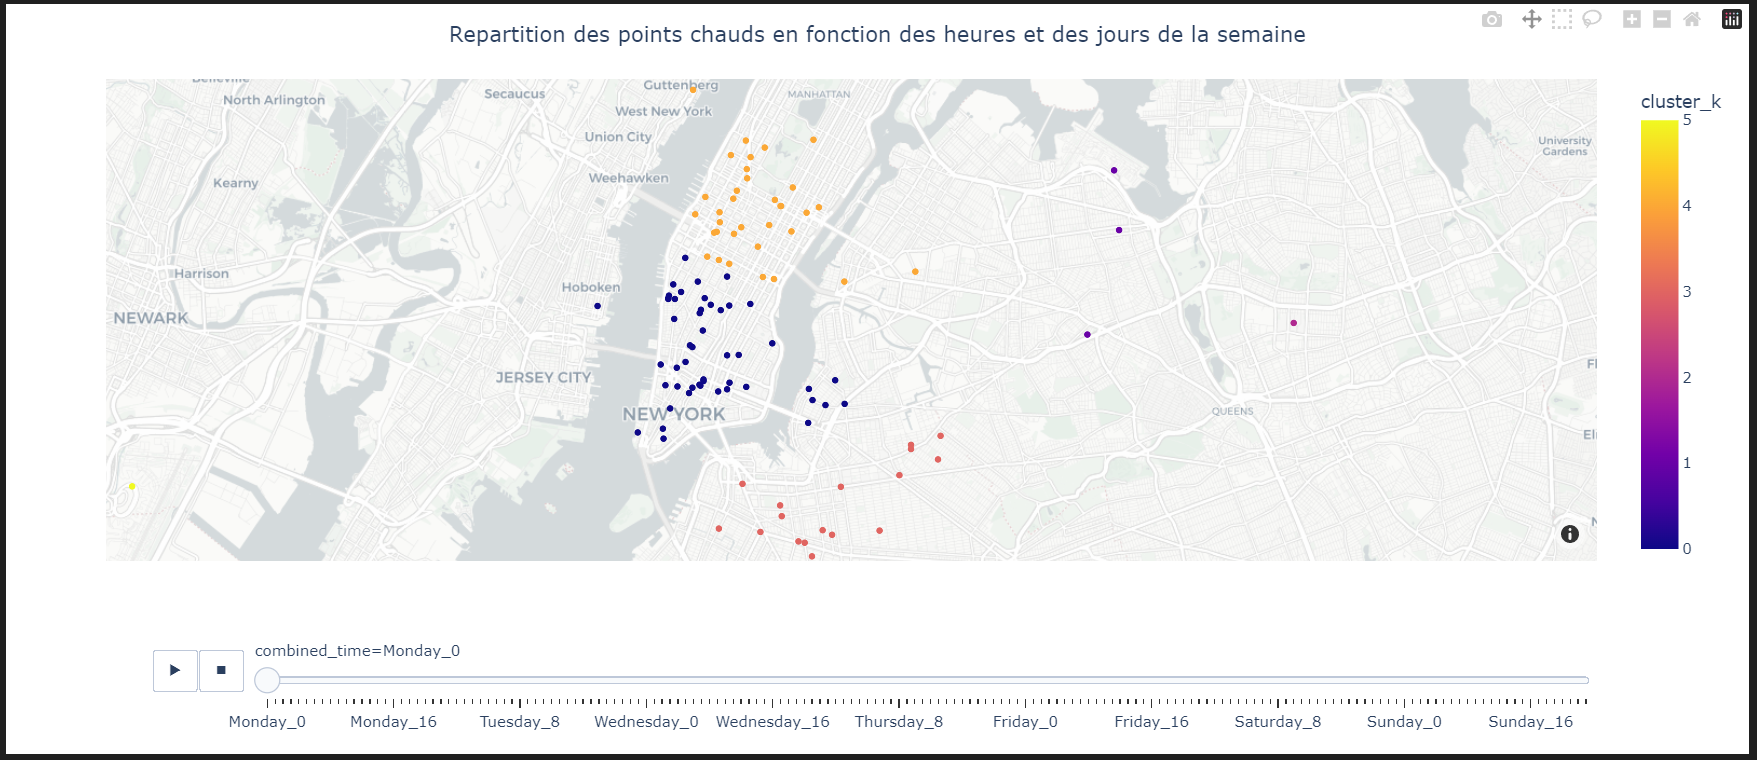